## Analysis code of denosing effect for peak detection with ground truth

In [1]:
import numpy as np

import pandas as pd
import matplotlib.ticker as ptick

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_palette("cividis")
import scipy.io
import scipy.ndimage as ndimage
from scipy import signal
from sklearn.metrics import mean_squared_error

from tqdm import tqdm
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from scipy.stats import gaussian_kde

In [2]:
def featureplot(
    data,
    x_name,
    y_name,
    hue="Name",
):

    g = sns.JointGrid(
        data=data[(data[x_name] > 0) & (data[y_name] > 0)],
        x=x_name,
        y=y_name,
        hue=hue,
        height=10,
        ylim=(1e-4, 1),
        xlim=(1e-4, 1),
    )
    g.plot_joint(sns.scatterplot, s=9, alpha=0.5, palette="tab10")
    g.plot_marginals(
        sns.histplot,
        fill=True,
        alpha=0.5,
        palette="tab10",
        binwidth=0.1,
        kde=True,
        log_scale=True,
    )
    g.ax_marg_x.set_xscale("log")
    g.ax_marg_y.set_yscale("log")
    sns.despine()


def positive_trigger(raw, unit=100, trigger_th=0.1, pre_tig=20, ch=2):
    raw = np.array(raw)
    i = pre_tig

    pos, _ = signal.find_peaks(
        raw[pre_tig : -1 * unit, ch], height=trigger_th, distance=20
    )
    pos = pos[pos > pre_tig]
    data = np.zeros((len(pos), unit, 4))
    for i in range(len(pos)):
        data[i] = raw[pos[i] - pre_tig : pos[i] - pre_tig + unit]

    return data


def load_dataset(at, t_max):
    file_path = f"../results"
    temp = np.load(file_path + "/median.npy").flatten()
    wv = np.zeros((len(temp), 3))
    nl = ["attenuated", "median", "ground_truth"]
    for i in range(3):
        wv[:, i] = np.load(file_path + f"/{nl[i]}.npy").flatten()
        wv[:, i] = wv[:, i] - np.mean(wv[:100, i])
        wv[:, i] = wv[:, i] / np.max(wv[:, i])

    wv[:, -1] = np.roll(wv[:, -1], -3)  # shift_compasation
    wv = wv[:t_max]
    wv_temp = np.zeros((len(wv), 4))
    wv_temp[:, 0] = wv[:, 0]  # at
    wv_temp[:, 2] = wv[:, 1]  # denoise
    wv_temp[:, 1] = ndimage.gaussian_filter1d(wv[:, 0], 3)
    wv_temp[:, 3] = wv[:, 2]  # gt

    return wv_temp


def mmse(wv1, wv2):
    wv1 = wv1 / wv1.max()
    wv2 = wv2 / wv2.max()
    return mean_squared_error(wv1, wv2)


def PSNR(wv1, wv2):
    wv1 = wv1 / wv1.max()
    wv2 = wv2 / wv2.max()
    mmse_cal = mmse(wv1, wv2)
    PSNR_cal = 10 * np.log10(wv1.max() ** 2 / mmse_cal)
    return PSNR_cal


def matching_label(
    x_1, x_2, width=10
):  # true positive, false positive, false negative classifcation using GT peaks
    tp_1 = []
    tp_2 = []

    for i in range(len(x_2)):
        temp = abs(x_1 - x_2[i])
        if np.min(temp) <= 20:
            x_2_to_1 = x_1[np.argmin(temp)]
            x_1_to_2 = x_2[np.argmin(abs(x_2 - x_2_to_1))]
            if x_1_to_2 == x_2[i]:
                tp_1.append(x_2[i])
                tp_2.append(x_2_to_1)
    tp_1 = np.array(tp_1)
    tp_2 = np.array(tp_2)
    fn = np.setdiff1d(x_1, tp_2)
    fp = np.setdiff1d(x_2, tp_1)
    return tp_1, fp, fn

## Dataloder (4ch=before denosing,after denosing, gaussian filter, ground truth)

In [3]:
# sns.set_context("poster")
t_max = 500000 * 4
fl = ["2.2"]
wv = load_dataset(fl[0], t_max=t_max)

# Histgram calculation

In [4]:
gt, _ = signal.find_peaks(
    wv[:t_max, -1] / wv[:t_max, -1].max(), height=0.1, distance=50
)

at, _ = signal.find_peaks(wv[:t_max, 0] / wv[:t_max, 0].max(), height=0.2, distance=50)
tp, fp, fn = matching_label(gt, at)  # nar

In [5]:
df = pd.DataFrame()
nl = ["Attenuated", "Denosied", "Gaussian", "Ground truth"]
for i in range(len(nl)):
    df[nl[i] + " scattering heigt[V]"] = np.concatenate(
        [wv[tp, i], wv[fn, i], wv[fp, i]]
    )
df["Label"] = np.concatenate(
    [["Signal" for i in range(len(tp) + len(fn))], ["Noise" for i in range(len(fp))]]
)
d1 = positive_trigger(wv, trigger_th=np.max(wv[:, -1] * 0.01), unit=200, pre_tig=30)

## Waveform and histgram plot

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

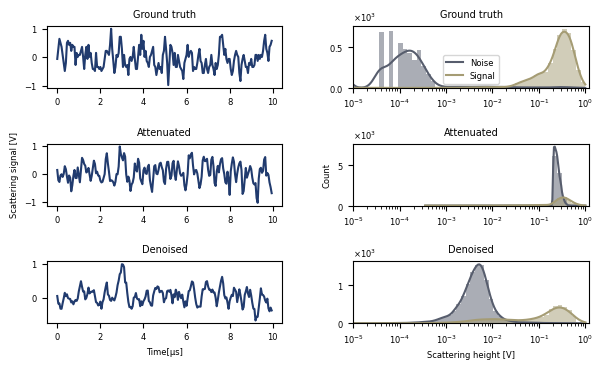

In [6]:
figure = plt.figure(figsize=(7, 7))
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 6
gs_master = GridSpec(
    nrows=4, ncols=2, height_ratios=[1, 1, 1, 3], wspace=0.3, hspace=0.6
)
c_l = ["mediumpurple", "darkcyan", "indigo"]
nl = ["Attenuated", "Gaussian", "Denoised", "Ground truth"]
cn = [3, 0, 2]
sns.set_palette("cividis")
for i in range(3):
    gs_1 = GridSpecFromSubplotSpec(nrows=1, ncols=1, subplot_spec=gs_master[0 + i, 0])
    axes_1 = figure.add_subplot(gs_1[:, :])
    axes_1.set_title(nl[cn[i]], fontsize=7)
    n = 2
    axes_1.plot(
        np.arange(200) / 20, d1[n, :, cn[i]] / d1[n, :, cn[i]].max(), label=nl[cn[i]]
    )

    if i == 1:
        axes_1.set_ylabel("Scattering signal [V]")
    if i == 2:
        axes_1.set_xlabel("Time[μs]")

    # axes_1.legend(loc="upper right")

for i in range(3):
    gs_1 = GridSpecFromSubplotSpec(nrows=1, ncols=1, subplot_spec=gs_master[0 + i, 1])
    axes_1 = figure.add_subplot(gs_1[:, :])
    axes_1.set_title(nl[cn[i]], fontsize=7)

    sns.histplot(
        data=df,
        x=df.columns[cn[i]],
        hue=df.columns[-1],
        log_scale=True,
        binwidth=0.1,
        lw=0,
        ax=axes_1,
        palette="cividis_r",
        legend=False,
        kde=True,
    )
    axes_1.set_xlabel("")
    axes_1.set_xlabel("")
    axes_1.set_ylabel("")
    axes_1.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
    axes_1.ticklabel_format(style="sci", axis="y", scilimits=(3, 3))
    axes_1.set_xlim(1e-5, 1.2)
    if i == 0:
        axes_1.legend(["Noise", "Signal"])
    if i == 1:
        axes_1.set_ylabel("Count")
    if i == 2:
        axes_1.set_xlabel("Scattering height [V]")

## Precision& recall calculation

In [7]:
SNR_L = np.arange(1000) / 1000 - 0.001
x_n = 50000 * 4
recall_list = np.zeros((len(SNR_L), 4))
precision_list = np.zeros((len(SNR_L), 4))
gt, _ = signal.find_peaks(wv[:x_n, -1] / wv[:x_n, -1].max(), height=0.1, distance=20)
for i in tqdm(range(len(SNR_L))):
    for j in range(4):
        at, _ = signal.find_peaks(
            wv[:x_n, j] / wv[:x_n, j].max(), height=SNR_L[i], distance=20
        )
        tp, fp, fn = matching_label(gt, at)
        recall_list[i, j] = len(tp) / (len(tp) + len(fn))
        precision_list[i, j] = len(tp) / (len(tp) + len(fp))

mAP = np.zeros((4))
for j in range(4):
    mAP[j] = np.trapz(x=recall_list[:, j], y=precision_list[:, j])

100%|██████████| 1000/1000 [00:28<00:00, 34.54it/s] 


## Precision-recall curve plot

Text(0, 0.5, 'Precision')

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

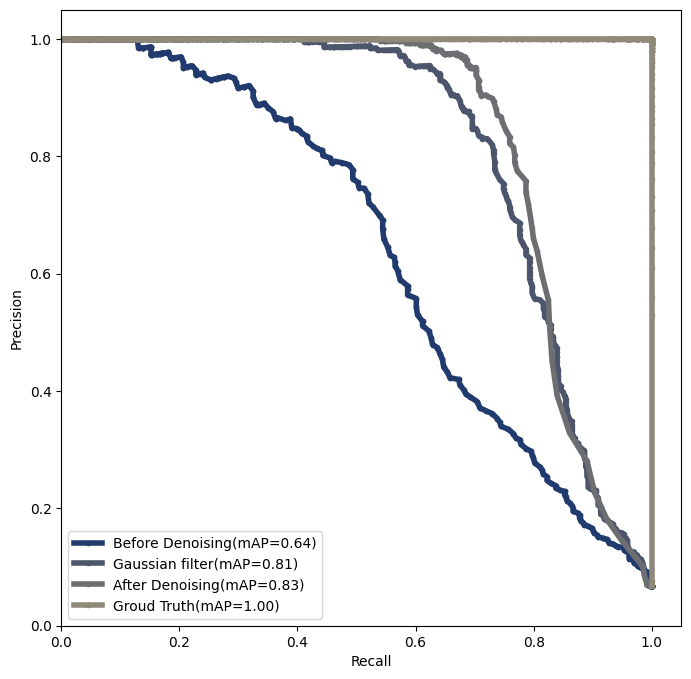

In [8]:
plt.figure(figsize=(8, 8))
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 10


cl = ["mediumpurple", "lightblue", "darkcyan", "indigo"]
nl = [
    f"Before Denoising(mAP={abs(mAP[0]):.2f})",
    f"Gaussian filter(mAP={abs(mAP[1]):.2f})",
    f"After Denoising(mAP={abs(mAP[2]):.2f})",
    f"Groud Truth(mAP={abs(mAP[3]):.2f})",
]

# plt.title("Attnuation OD=3.2")
for i in range(4):
    plt.plot(recall_list[:, i], precision_list[:, i], "-o", label=nl[i], lw=4, ms=3)
plt.legend()

# plt.grid()
plt.xlim(0, 1.05)
plt.ylim(0, 1.05)


plt.xlabel("Recall")
plt.ylabel("Precision")

In [9]:
gt, _ = signal.find_peaks(
    wv[:t_max, -1] / wv[:t_max, -1].max(), height=0.1, distance=50
)
at, _ = signal.find_peaks(wv[:t_max, 0] / wv[:t_max, 0].max(), height=0.2, distance=50)

In [10]:
at = at[at > 100]
cal = np.zeros((len(at), 3))
for i in range(3):
    for j in range(len(at)):
        cal[j, i] = PSNR(
            wv[at[j] - 100 : at[j] + 100, i], wv[at[j] - 100 : at[j] + 100, -1]
        )

# PSNR_scatter plot

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

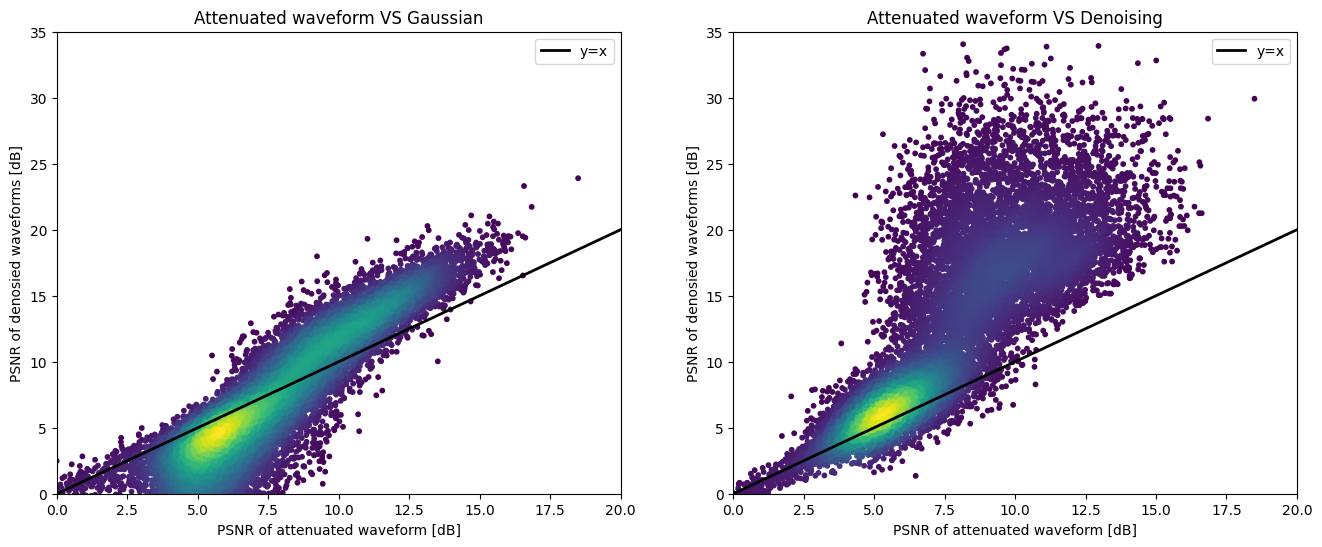

In [11]:
fig = plt.figure(figsize=(16, 6))
nl = ["Gaussian", "Denoising"]
for i in range(2):
    plt.subplot(1, 2, 1 + i)
    plt.title(f"Attenuated waveform VS {nl[i]}")
    x = cal[:, 0]
    y = cal[:, i + 1]
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)
    idx = z.argsort()
    x1 = np.arange(40)
    plt.plot(x1, x1, "k-", lw=2, label="y=x")
    plt.scatter(x, y, c=z, s=10, cmap="viridis")
    plt.xlabel("PSNR of attenuated waveform [dB]")
    plt.ylabel("PSNR of denosied waveforms [dB]")
    plt.xlim(0, 20)
    plt.ylim(0, 35)
    plt.legend()

plt.show()